In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv('gdrive/MyDrive/d.csv')

In [7]:
df1 = df.head(660)

In [8]:
len(df1)

660

In [9]:
df1['Outcome'].value_counts()

0    435
1    225
Name: Outcome, dtype: int64

In [10]:
0.2*660

132.0

In [11]:
train = df1.head(528)

In [12]:
test = df1.tail(132)

In [13]:
test.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
528,0,117,66,31,188,30.8,0.493,22,0


In [14]:
train.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
527,3,116,74,15,105,26.3,0.107,24,0


In [15]:
tree_model2 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, min_samples_leaf=5, random_state=2020)

In [16]:
x_train = train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_train = train['Outcome']

In [17]:
x_test = test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_test = test['Outcome']

In [18]:
tree_model2 = tree_model2.fit(x_train,y_train) 

In [19]:
tree_model2.get_depth()

4

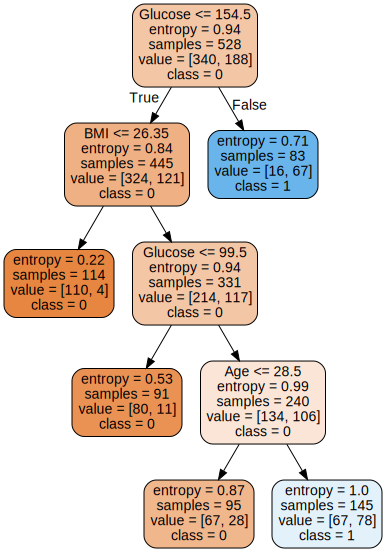

In [20]:
columns = list(x_train.columns)
export_graphviz(tree_model2, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [21]:
tree_model2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2020,
 'splitter': 'best'}

In [25]:
precision_score(y_test,tree_model2.predict(x_test))

0.6041666666666666

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,tree_model2.predict(x_test))

0.7954545454545454

In [28]:
f1_score(y_test, tree_model2.predict(x_test),average='macro')

0.7657574761748275

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
tree_model2.predict(df.iloc[[750, 747, 753, 745]].drop('Outcome',axis=1))

array([0, 0, 1, 1])

In [ ]:
df.iloc[[750, 747, 753, 745]].drop('Outcome',axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
750,4,136,70,0,0,31.2,1.182,22
747,1,81,74,41,57,46.3,1.096,32
753,0,181,88,44,510,43.3,0.222,26
745,12,100,84,33,105,30.0,0.488,46
